# Basic Recommender System_Movie Lens Dataset

We build a basic recommendation system by suggesting items that are most similar to a particular items. Items in this case are movies. 

Do note that this is not a true robust recommendation system, as it just tells you what movies / items are most similar to your movie choice.

## 0. Import Libraries and Data Preparation

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# read movies dataset
col_names = ['user_id','item_id','rating','timestamp']
ratings_df = pd.read_csv('u.data', sep = '\t', names = col_names)

In [3]:
ratings_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
ratings_df.shape

(100003, 4)

In [5]:
# read movie titles dictionary
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
movie_titles.shape

(1682, 2)

In [7]:
# Merge datasets
df = pd.merge(ratings_df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## 2. Exploratory Data Analysis & Data Cleaning
Let's create a dataset of movies and their average rating received and total ratings received

In [8]:
# group the original dataset by 'title' column and list the mean of all ratings
all_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
all_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


When you explore the above dataset, you can see some movies with average ratings as 5 or 1, which hihgly unlikely.
<br>This means that these are outliers, maybe they have only received 1 or 2 ratings with same rating, which is why they such average ratings.

Therefore, let us also include the total number of ratings received by the movies as well.

In [9]:
# do the same as above for count of the ratings received
all_ratings['total_rating'] = pd.DataFrame(df.groupby('title')['rating'].count())
all_ratings.head()

,rating,total_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [10]:
# rename columns for better comprehension
all_ratings.columns = ['avg_rating', 'total_rating']
all_ratings.head()

,avg_rating,total_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


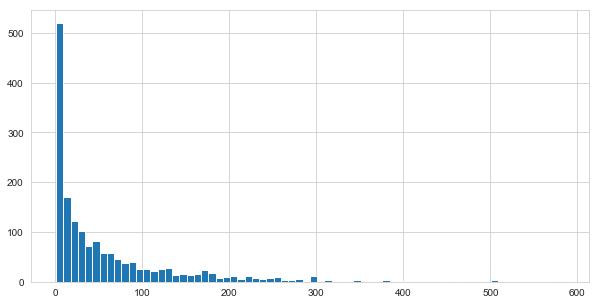

In [11]:
# plot a histogram of total ratings received per movie
plt.figure(figsize=(10,5))
all_ratings['total_rating'].hist(bins=70)

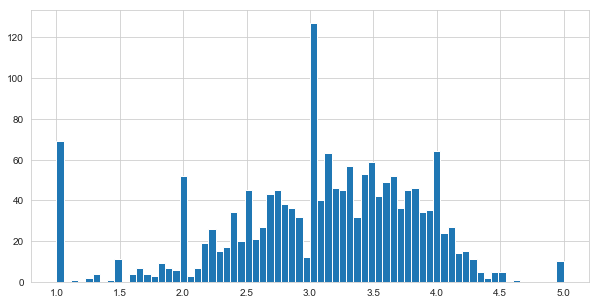

In [12]:
# plot a histogram of average ratings received
plt.figure(figsize=(10,5))
all_ratings['avg_rating'].hist(bins=70)

We can see that there are some outliers in the dataset as well, which need to be treated.

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

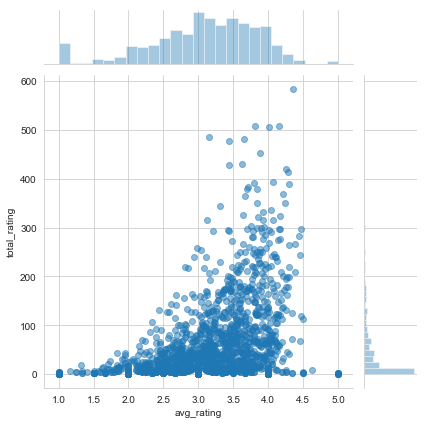

In [13]:
# plot a jointplot for both avg and total count of ratings received
# jointplot is combination of a scattered plot and histograms
plt.figure(figsize=(10,10))
sns.jointplot('avg_rating', 'total_rating', data=all_ratings, alpha=0.5) # alpha parameter tunes the transparency of the plots

In [14]:
# Movies with the highest average rating
all_ratings.sort_values('avg_rating', ascending=False).head(10)

,avg_rating,total_rating
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


As you can see, there are multiple movies that have perfect ratings (5) but have been rated only a few times. Which explains their perfect scores. These ratings are not true depictions of user ratings and might produce inaccuracy in our recommendation system.

Therefore, we will filter out the movies that have been rated less than 100 times for better results.

In [15]:
all_ratings.shape # calculate dimensions of the un-filtered dataset

(1664, 2)

In [16]:
# filter out the movies that have a total ratings count less than 100
all_ratings_100 = all_ratings[all_ratings['total_rating']>=100]
all_ratings_100.shape # calculate dimensions of the filtered dataset

(338, 2)

In [17]:
all_ratings_100.head() # print top 5 rows

,avg_rating,total_rating
title,,
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
2001: A Space Odyssey (1968),3.969112,259
Absolute Power (1997),3.370079,127
"Abyss, The (1989)",3.589404,151


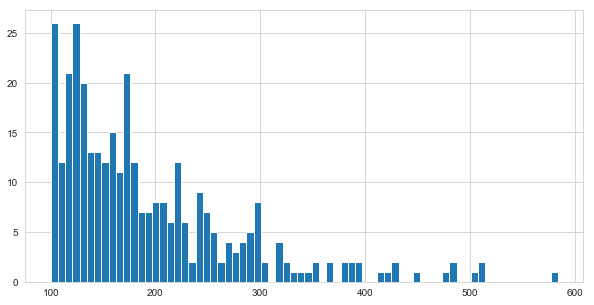

In [18]:
# plot a histogram of total ratings received per movie
plt.figure(figsize=(10,5))
all_ratings_100['total_rating'].hist(bins=70)

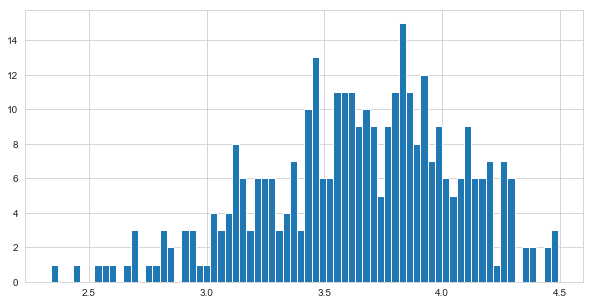

In [19]:
# plot a histogram of average ratings received
plt.figure(figsize=(10,5))
all_ratings_100['avg_rating'].hist(bins=70)

<Figure size 720x720 with 0 Axes>

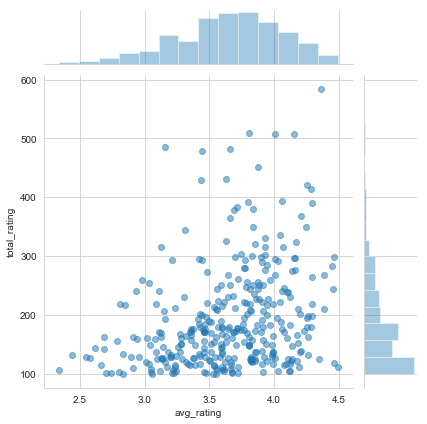

In [20]:
# plot a jointplot for both avg and total count of ratings received
# jointplot is combination of a scattered plot and histograms
plt.figure(figsize=(10,10))
sns.jointplot('avg_rating', 'total_rating', data=all_ratings_100, alpha=0.5) # alpha parameter tunes the transparency of the plots

We can see that there is a great reduction in outliers as well

## 3. Create Simple Recommender System
Now let's create a 2D matrix on the original dataset, which has the user ids on one access and the movie title on another axis. 

In [21]:
# create a pivot table for the required matrix
# index column goes on x-axis
# columns goes on the y-axis
# values defines the values that map in the matrix wrt to the x & y axes
df_matrix = df.pivot_table(index='user_id',columns='title',values='rating')
df_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's get the ratings for two movies:
1. Star Wars
2. Liar Liar

In [22]:
starwars_user_ratings = df_matrix['Star Wars (1977)'] # user ratings for Star Wars
starwars_user_ratings.head() # print top 5 rows

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Now to find the movies with similar ratings, we can correlate the user ratings of Star Wars with the user ratings of all other movies.

The system will then recommend the movies with the highest correlation with Star Wars.

In [23]:
movies_corr_starwars = df_matrix.corrwith(starwars_user_ratings)

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
# There are a lot NaN values in here, therefore, we will clean that.
movies_corr_starwars = pd.DataFrame(movies_corr_starwars,columns=['Correlation']) # convert to Dataframe
movies_corr_starwars.dropna(inplace=True) # drop null & NaN values
movies_corr_starwars.head() # print top 5 rows

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [25]:
# print top 10 movies that are correlated with Star Wars
movies_corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


As noticed earlier, there are multiple movies with the perfect score. We must filter out the movies that have total ratings count less than 100

In [30]:
movies_corr_starwars = movies_corr_starwars.join(all_ratings['total_rating'])
movies_corr_starwars.head()

,Correlation,total_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [31]:
movies_corr_starwars[movies_corr_starwars['total_rating']>100].sort_values('Correlation', ascending = False).head()

,Correlation,total_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Therefore, the top movies recommended are printed above.